<a href="https://colab.research.google.com/github/ndungek/Threads-Reviews-Sentiment-Analysis/blob/main/reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THREADS REVIEWS SENTIMENT ANALYSIS**


---


*Maureen Kitang'a*

## Abstract
In the bustling world of social media and messaging apps, Threads emerges as a fresh contender, stepping into the limelight in July. As it embarks on its journey in the ever-evolving landscape, we set out to decipher the sentiments of Threads app users through a comprehensive sentiment analysis project.

With a relatively small training dataset consisting of just over 5900 examples, we faced the challenge of skewed data. However, our goal was clear: predict sentiment – be it positive, negative, or neutral – with precision and insight.

This notebook aims to:
* Look for engaging information regarding the reviews.
* Perform data cleaning and preprocessing.
* Build ML models.
* Predict the sentiment of the reviews.

## **IMPORTING LIBRARIES**

In [1]:
#importing libraries
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## **LOADING THE DATASET**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

folder_path = '/content/drive/My Drive/Threads-Reviews-Sentiment-Analysis'
os.chdir(folder_path)

In [4]:
folder_contents = os.listdir()
print(folder_contents)

['threads_reviews.csv', 'README.md', 'LICENSE', '.git', 'reviews.ipynb']


In [5]:
df = pd.read_csv("threads_reviews.csv")

df.head()

,source,review_description,rating,review_date
0,Google Play,Very good app for Android phone and me,5,27-08-2023 10:31
1,Google Play,Sl👍👍👍👍,5,27-08-2023 10:28
2,Google Play,Best app,5,27-08-2023 9:47
3,Google Play,Gatiya app,1,27-08-2023 9:13
4,Google Play,Lit bruv,5,27-08-2023 9:00


In [6]:
def df_shape(df, ds_name):
    print(f"The {ds_name} dataset has {df.shape[0]} rows and {df.shape[1]}")

df_shape(df, "Threads Reviews")

The Threads Reviews dataset has 40435 rows and 4


In [7]:
def df_info(df, ds_name):
    print(f"The {ds_name} dataset info:\n")
    print(df.info())

df_info(df, "Threads Reviews")

The Threads Reviews dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40435 entries, 0 to 40434
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              40435 non-null  object
 1   review_description  40435 non-null  object
 2   rating              40435 non-null  int64 
 3   review_date         40435 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
None


In [8]:
#Display Unique val in each col
def uni_vals(df, ds_name):
    print(f"The number of unique values in each column in {ds_name} dataset:\n")
    print(df.nunique())

uni_vals(df, "Threads Reviews")

The number of unique values in each column in Threads Reviews dataset:

source                    2
review_description    32894
rating                    5
review_date           16742
dtype: int64


## **DATA CLEANING**

In [9]:
def check_missing(df, ds_name):
    print(f"Null Values in each col in the {ds_name} dataset:\n")
    print(df.isnull().sum())

check_missing(df, "Threads Reviews")

Null Values in each col in the Threads Reviews dataset:

source                0
review_description    0
rating                0
review_date           0
dtype: int64


In [10]:
def check_duplicates(df, ds_name):
    print(f"Duplicate Values in each col in the {ds_name} dataset:\n")
    print(df.duplicated().sum())

check_duplicates(df, "Threads Reviews")

Duplicate Values in each col in the Threads Reviews dataset:

95


In [11]:
# handling the duplicates
def remove_duplicated_rows(data):
    """Simple Function to remove duplicated rows"""
    data.drop_duplicates(subset=None, keep="first", inplace=True)
    return data


df = remove_duplicated_rows(df)

## **EXPLORATORY DATA ANALYSIS**

### **UNIVARIATE ANALYSIS**

#### `Source`

In [12]:
df["source"].value_counts()

Google Play    36628
App Store       3712
Name: source, dtype: int64

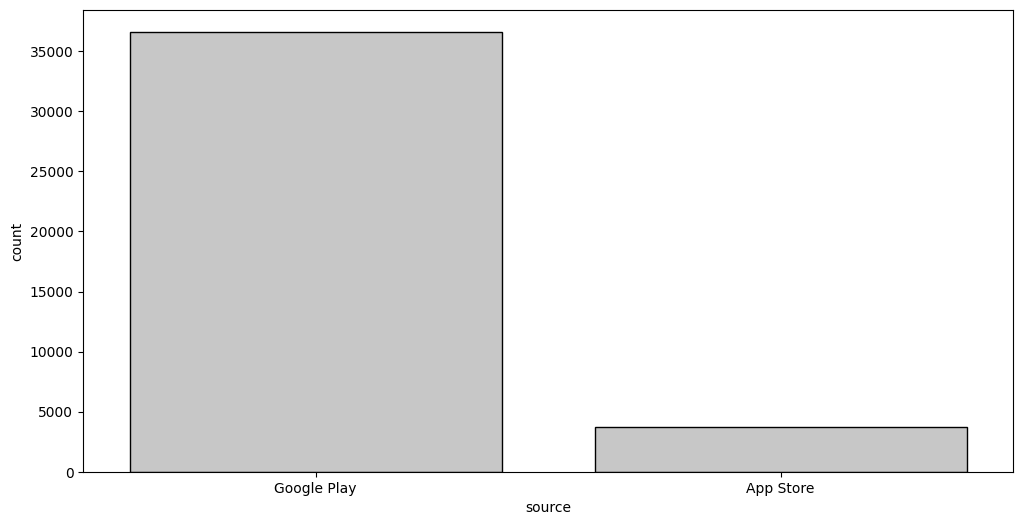

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='source', color = "#C7C7C7", edgecolor='black')
plt.show()

>> The Threads app has garnered significant traction on Google Play, boasting a remarkable `36,628` downloads, representing a substantial percentage of its user base. In contrast, the App Store records `3,712` downloads, reflecting a distinct user presence. These figures underscore the app's popularity and reach on the Google Play platform.

#### `rating`

In [14]:
df['rating'] = df['rating'].astype('int32')

In [15]:
df['rating'].value_counts()

5    18168
1    12914
4     3786
3     3175
2     2297
Name: rating, dtype: int64

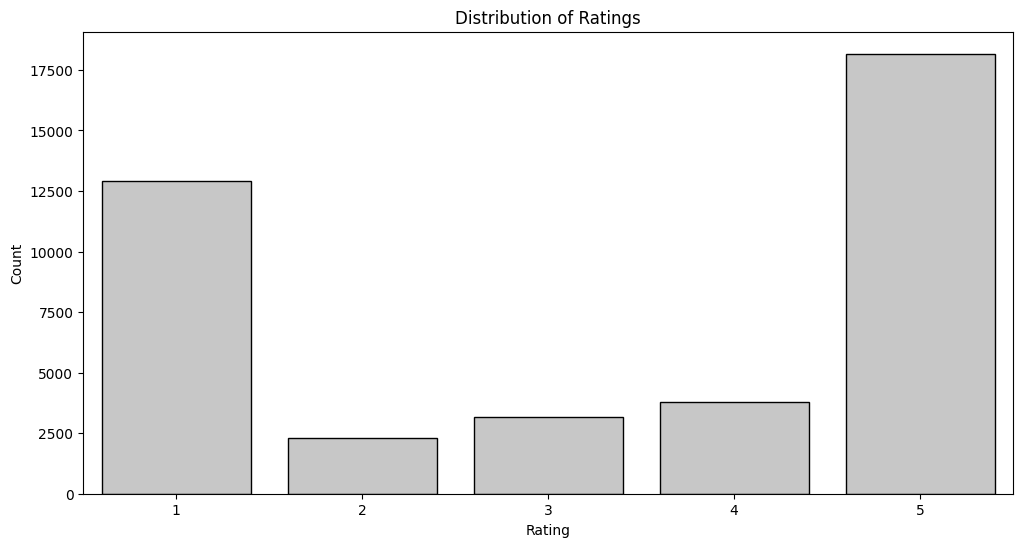

In [16]:
# Create a countplot to visualize the distribution of ratings
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', color='#C7C7C7', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rotation=0)
plt.show()

>> The most common rating for the given dataset is "Rating 5," with 18,168 occurrences, indicating that a significant portion of the ratings are highly positive. "Rating 1" also has a substantial count at 12,914, suggesting a notable presence of negative or low ratings. The presence of a large number of ratings at both ends of the spectrum (high and low) indicates a diverse range of opinions and experiences with the subject of these ratings, potentially highlighting areas for improvement or further analysis.

In [17]:
# Replace non-numeric ratings with 'Unknown', and convert others to integers
df['rating'] = df['rating'].replace([1,2], 'bad')
df['rating'] = df['rating'].replace(3, 'neutral')
df['rating'] = df['rating'].replace([4,5], 'good')

Text(0.5, 1.0, 'Rating Distribution Across Dataset')

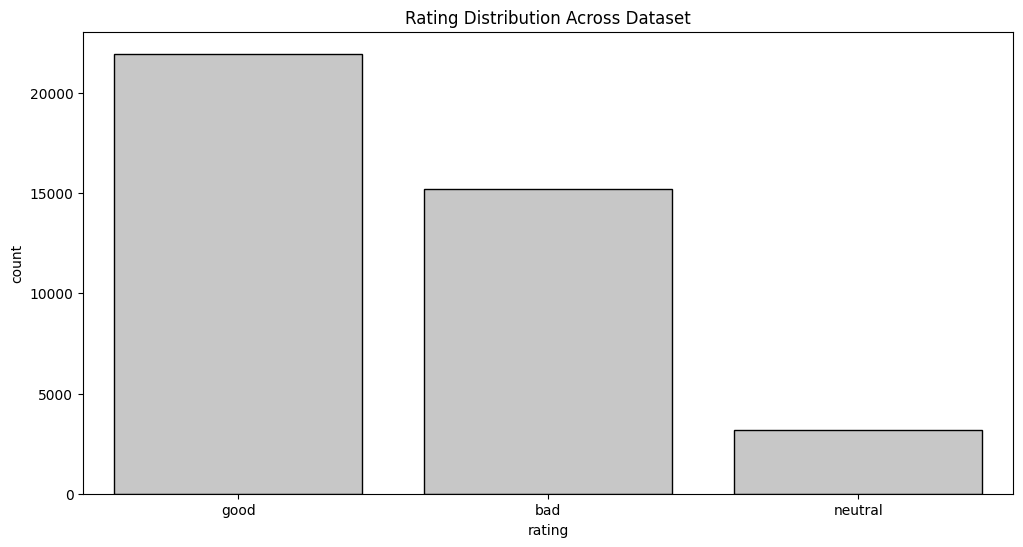

In [18]:
# Create a countplot to visualize the distribution of rating categories
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='rating', color='#C7C7C7', edgecolor='black')
ax.set_title('Rating Distribution Across Dataset')

#### `review_description`

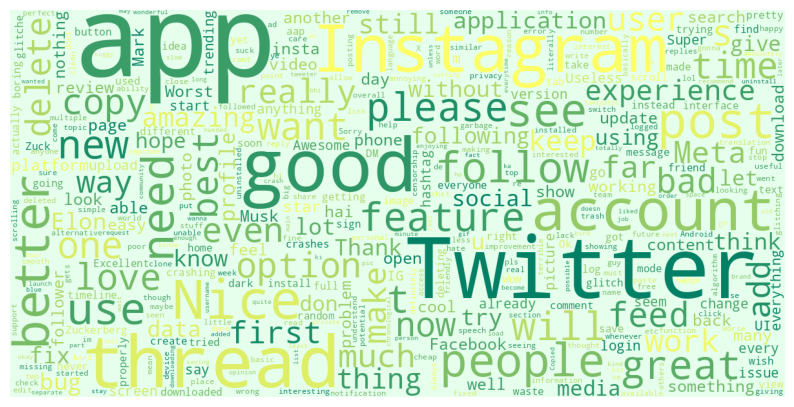

In [19]:
from wordcloud import WordCloud


# Concatenate all reviews into a single string
reviews_text = ' '.join(df['review_description'])

# Create a Word Cloud
plt.figure(figsize=(10, 10))
wc = WordCloud(
    max_words=1000,
    min_font_size=10,
    height=600,
    width=1200,
    collocations=False,
    background_color='#e6ffed',
    colormap='summer'
).generate(reviews_text)

# Display the Word Cloud
plt.axis('off')
plt.imshow(wc)
plt.show()

In [20]:
def top_words(text):
    word = pd.DataFrame(wc.process_text(''.join(text)).items()).sort_values(1, ascending=False)

    print('Top 5 words that appear most frequently:\n')
    for i in range(5):
        item = word.iloc[i]
        print(item[0] + '\t--> ' + str(item[1]))
top_words(df['review_description'])

Top 5 words that appear most frequently:

app	--> 11369
Twitter	--> 5485
thread	--> 4396
Instagram	--> 3740
good	--> 3019


>> The analysis of frequently occurring words reveals that the discussion around the subject, likely an app, prominently includes terms such as 'app,' 'Twitter,' 'thread,' 'Instagram,' and 'good.' This suggests that users are actively engaging with and discussing various aspects of the app, including its integration with social media platforms like Twitter and Instagram, as well as its overall quality, with 'good' being a recurring descriptor.

#### `review_date`

In [21]:
df['review_date'] = pd.to_datetime(df['review_date'])

df['Date'] = df['review_date'].apply(lambda x: x.date())

reviews_per_day = df.groupby(df['Date']).count()['review_description']
reviews_per_day = reviews_per_day.reset_index()
reviews_per_day['Month'] = reviews_per_day['Date'].apply(lambda x: x.month)

In [22]:
# Group reviews by date and count the number of reviews per day
reviews_per_day = df.groupby('Date').count()['review_description'].reset_index()

# Rename the count column
reviews_per_day.rename(columns={'review_description': 'Total_reviews'}, inplace=True)

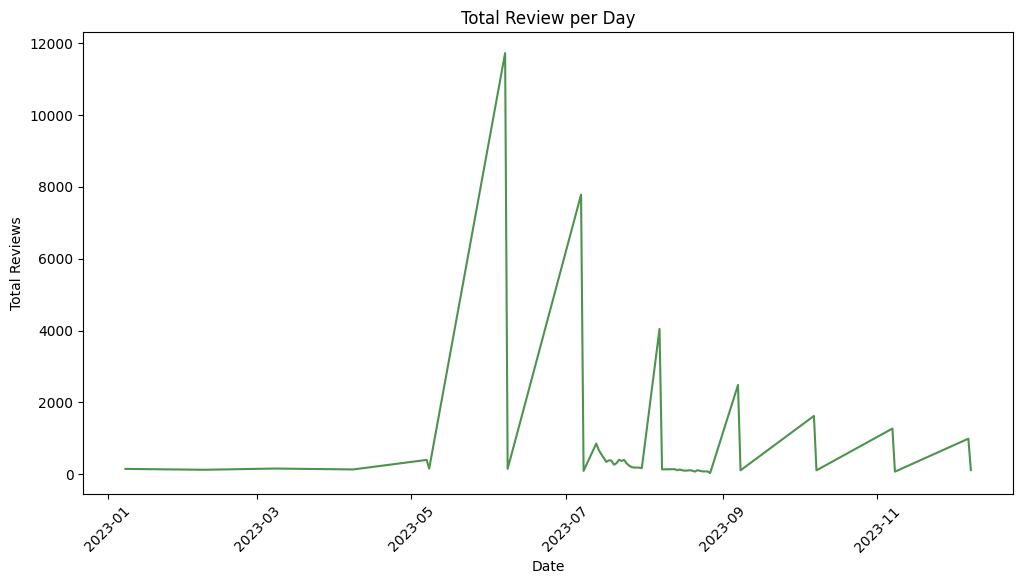

In [23]:
# Create a line plot to visualize the total reviews per day
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=reviews_per_day, x='Date', y='Total_reviews', color='#4c934c')
ax.set_title('Total Review per Day')
ax.set_xlabel('Date')
ax.set_ylabel('Total Reviews')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

>> Most reviews were given on the release date, July 5th, and the following day, July 7th

### **BIVARIATE ANALYSIS**

In [59]:
# Group by 'source' and 'rating' columns to get sentiment counts per source
source_sentiment_group = df.groupby(['source', 'rating'])['rating'].count().reset_index(name='count')

# Calculate the ascending order of sources based on total review count
ascending_order = df['source'].value_counts().index

# Loop through each source and print the counts for each rating
for source in ascending_order:
    source_data = source_sentiment_group[source_sentiment_group['source'] == source]
    print(f"Source: {source}")
    for index, row in source_data.iterrows():
        print(f"Rating {row['rating']}: {row['count']} counts")
    print()

Source: Google Play
Rating bad: 13416 counts
Rating good: 20451 counts
Rating neutral: 2761 counts

Source: App Store
Rating bad: 1795 counts
Rating good: 1503 counts
Rating neutral: 414 counts



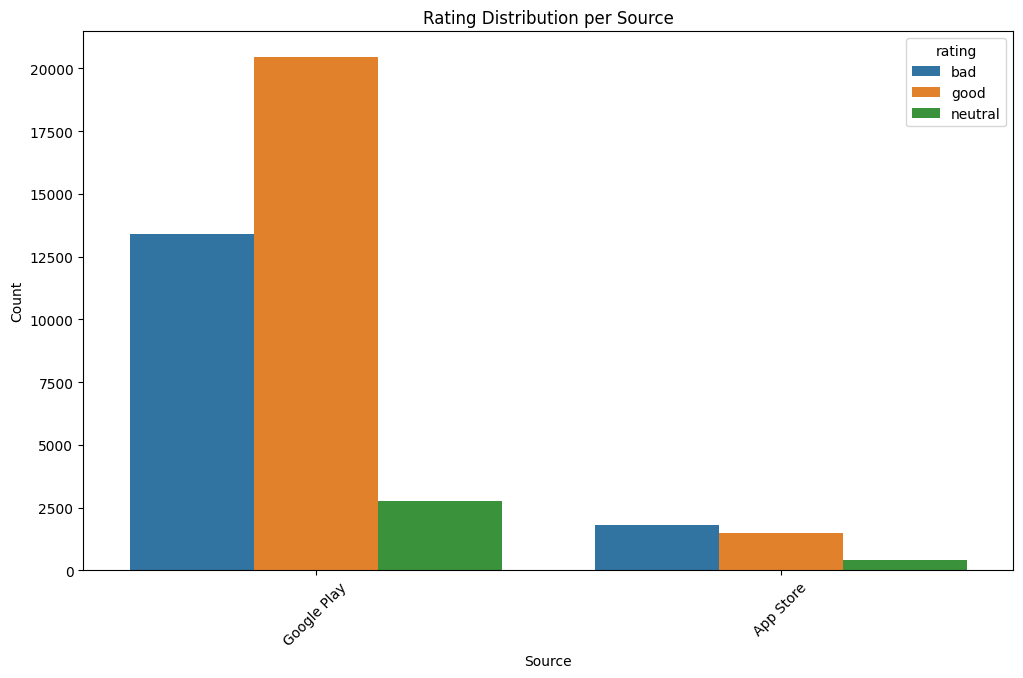

In [24]:
# Group by 'source' and 'rating' columns to get sentiment counts per source
source_sentiment_group = df.groupby(['source', 'rating'])['rating'].count().reset_index(name='count')

# Calculate the ascending order of sources based on total review count
ascending_order = df['source'].value_counts().index

# Create a bar plot for sentiment distribution per source
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='source', y='count', hue='rating', data=source_sentiment_group, order=ascending_order)
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Rating Distribution per Source')
plt.xticks(rotation=45)
plt.show()


>> Analyzing the distribution of ratings within each source reveals interesting patterns. On Google Play, the majority of ratings are positive ('good') with a substantial count of 20,451, indicating a strong positive sentiment from users. However, there is also a noteworthy count of 'bad' ratings at 13,416, suggesting room for improvement. Interestingly, 'neutral' ratings on Google Play stand at 2,761, indicating a moderate presence of mixed sentiments. In contrast, the App Store exhibits a different pattern, with a relatively balanced distribution between 'bad' and 'good' ratings, at 1,795 and 1,503 counts, respectively. 'Neutral' ratings on the App Store total 414, reflecting a smaller proportion.

## Data PreProcessing

>> Text data often contains special characters and uppercase letters, which can lead to inconsistencies during analysis. Cleaning the text involves removing special characters and converting text to lowercase for consistency.

In [25]:
# Define a function to clean text by removing special characters and converting to lowercase
def clean_text(text):
    # Remove special characters and numbers, keep only letters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

# Apply the clean_text function to the 'review_description' column
df['cleaned_review_description'] = df['review_description'].apply(clean_text)

>> Removing emoticons during data preprocessing is essential for text analysis tasks to reduce noise and ensure consistency in the text data. Emoticons, while expressive, do not carry semantic meaning and can potentially introduce bias or interfere with analysis. By removing them, the focus remains on the meaningful textual content, leading to more accurate and reliable results.

In [26]:
# Define a function to remove emoticons
def remove_emoticons(text):
    # Define a regular expression pattern to match emoticons
    emoticon_pattern = r'(?::|;|=)(?:-)?(?:\)|\(|D|P)'
    # Remove emoticons from the text
    text = re.sub(emoticon_pattern, '', text)
    return text
df['cleaned_review_description'] = df['cleaned_review_description'].apply(remove_emoticons)

>> Tokenization breaks text into individual words or tokens. It's a necessary step for text analysis, as it allows us to work with individual words.

In [27]:
# Define a function for tokenization (splitting text into words)
def tokenize_text(text):
    return word_tokenize(text)

# Apply tokenization to the 'cleaned_review_description' column
df['tokens'] = df['cleaned_review_description'].apply(tokenize_text)


>>  Stopwords are common words (e.g., "the," "and," "is") that don't usually contribute much to the analysis. Removing them reduces noise in the data.

In [28]:
# Get a set of English stopwords
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Apply stopword removal to the 'tokens' column
df['cleaned_tokens'] = df['tokens'].apply(remove_stopwords)

>> Lemmatization reduces words to their base or root form. It ensures that words like "running" and "ran" are treated as the same word ("run"), improving the consistency of the data.

In [29]:
# Initialize a WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply lemmatization to the 'cleaned_tokens' column
df['lemmatized_tokens'] = df['cleaned_tokens'].apply(lemmatize_tokens)

In [30]:
total_words_before_cleaning = df['review_description'].apply(lambda x: len(x.split())).sum()
print('Total words before cleaning: {}'.format(total_words_before_cleaning))


# Calculate and print the total number of words after cleaning
total_words_after_cleaning = df['cleaned_review_description'].apply(lambda x: len(x.split())).sum()
print('Total words after cleaning: {}'.format(total_words_after_cleaning))

Total words before cleaning: 493447
Total words after cleaning: 475334


#### **TRAIN-TEST SPLIT**

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df['review_description'], df['rating'], test_size=0.2)
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape (32272,)
y_train shape (32272,)
X_test shape (8068,)
y_test shape (8068,)


In [35]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.fit_transform(y_test)
print("y Train: ",y_train[0:10])
print("y Test: ",y_test[0:10])

y Train:  [1 1 1 0 0 2 1 1 1 1]
y Test:  [1 0 0 0 0 1 0 0 1 0]


### **COUNT VECTORS**

> CountVectorizer is a method used for text vectorization that converts a collection of text documents to a matrix of token counts.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer=CountVectorizer()
count_vectorizer.fit(X_train)
X_train_count=count_vectorizer.transform(X_train)
X_test_count=count_vectorizer.transform(X_test)

### **TF-IDF**
> TF-IDF (Term Frequency-Inverse Document Frequency) is a method for text vectorization that quantifies the importance of a word within a document relative to a collection of documents.

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

#### **Word Level TF-IDF**
> N-gram TF-IDF considers sequences of 'n' words as tokens, allowing it to capture contextual information.

In [39]:
tfIdf_word_level=TfidfVectorizer()
tfIdf_word_level.fit(X_train)
X_train_word_level=tfIdf_word_level.transform(X_train)
X_test_word_level=tfIdf_word_level.transform(X_test)

#### **N-gram Level TF-IDF**
> Character-level TF-IDF considers individual characters as tokens, which can be useful for capturing text patterns.

In [40]:
tfIdf_Ngram=TfidfVectorizer(ngram_range=(2,3))
tfIdf_Ngram.fit(X_train)
X_train_Ngram=tfIdf_Ngram.transform(X_train)
X_test_Ngram=tfIdf_Ngram.transform(X_test)

#### **Character Level TF-IDF**

In [41]:
tfIdf_char=TfidfVectorizer(analyzer="char",ngram_range=(2,3))
tfIdf_char.fit(X_train)
X_train_char=tfIdf_char.transform(X_train)
X_test_char=tfIdf_char.transform(X_test)

## **MODELING**

### **LOGISTIC REGRESSION**
> Logistic Regression is a fundamental machine learning algorithm primarily used for binary classification tasks

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [47]:
logistic = LogisticRegression(max_iter=1000)  # You can adjust the value as needed

logistic_model_count = logistic.fit(X_train_count, y_train)
log_cross_val_count = cross_val_score(logistic_model_count, X_test_count, y_test, cv=10).mean()

print("Cross Validation of Count Vector in Logistic Regression: ", log_cross_val_count)

Cross Validation of Count Vector in Logistic Regression:  0.7706994628268162


In [52]:
logistic_model_word=logistic.fit(X_train_word_level,y_train)
log_cross_val_word=cross_val_score(logistic_model_word,X_test_word_level,y_test,cv=10).mean()
print("Cross Validation of Word Level in Logistic Regression: ",log_cross_val_word)

Cross Validation of Word Level in Logistic Regression:  0.7856974180634092


In [49]:
logistic_model_word=logistic.fit(X_train_Ngram,y_train)
log_cross_val_Ngram=cross_val_score(logistic_model_word,X_test_Ngram,y_test,cv=10).mean()
print("Cross Validation of N-Gram in Logistic Regression: ",log_cross_val_Ngram)

Cross Validation of N-Gram in Logistic Regression:  0.7177762198628009


In [50]:
logistic_model_char=logistic.fit(X_train_char,y_train)
log_cross_val_char=cross_val_score(logistic_model_char,X_test_char,y_test,cv=10).mean()
print("Cross Validation of Character Level in Logistic Regression: ",log_cross_val_char)

Cross Validation of Character Level in Logistic Regression:  0.788919842199612


#### **LOGISTIC REGRESSION - MODEL RESULTS**

In [58]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

logistic_results = pd.DataFrame({
    "Values": [log_cross_val_count, log_cross_val_word, log_cross_val_Ngram, log_cross_val_char],
    "Function": ["Count Vector", "Word Level TF-IDF", "N-Gram", "Character Level TF-IDF"]
})

# Sort the DataFrame by "Values" in descending order
logistic_results = logistic_results.sort_values(by="Values", ascending=True)

# Create subplots
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Bar(x=[round(i, 5) for i in logistic_results["Values"]],
                     y=logistic_results["Function"],
                     orientation='h',
                     marker=dict(color='royalblue'),
                     text=[f'{round(i, 5)}' for i in logistic_results["Values"]],
                     textposition='inside',
                     textfont=dict(color='white'),
                     ),
              row=1, col=1)

fig.update_layout(title_text="Cross Validation Results for Different Vectorization Methods",
                  xaxis_title="Accuracy",
                  xaxis=dict(range=[0, 1]),
                  showlegend=False)

fig.show()